In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:

data = {"text": [
    "Congratulations! You have won a free lottery ticket. Claim now!", 
    "Hey, how are you doing today?", 
    "Urgent: Your bank account has been compromised! Click here to secure it.",
    "Let's meet for coffee tomorrow.",
    "Exclusive offer! Get 50% discount on all products. Limited time only.",
    "Don't forget our meeting at 3 PM.",
    "You have been selected for a free vacation! Call now to claim.",
    "Can you send me the project files?",
    "Final notice: Your car insurance is expiring soon. Renew now.",
    "See you at the gym later!"
],
    "label": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Spam, 0 = Not Spam
}

df = pd.DataFrame(data)



Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[1 0]
 [0 1]]


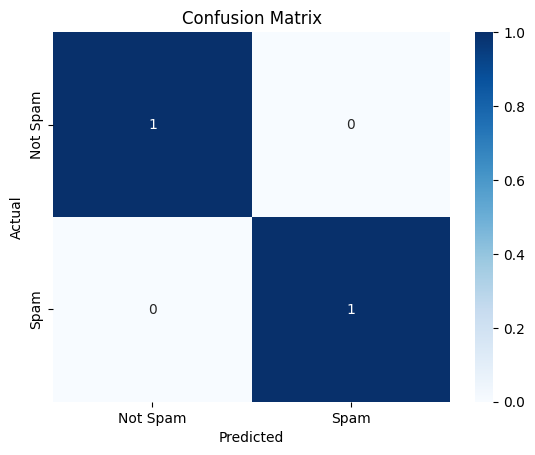

In [4]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    return text

df["text"] = df["text"].apply(preprocess_text)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

# Visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Load dataset (using a sample dataset)
data = {"text": [
    "Congratulations! You have won a free lottery ticket. Claim now!", 
    "Hey, how are you doing today?", 
    "Urgent: Your bank account has been compromised! Click here to secure it.",
    "Let's meet for coffee tomorrow.",
    "Exclusive offer! Get 50% discount on all products. Limited time only.",
    "Don't forget our meeting at 3 PM.",
    "You have been selected for a free vacation! Call now to claim.",
    "Can you send me the project files?",
    "Final notice: Your car insurance is expiring soon. Renew now.",
    "See you at the gym later!"
],
    "label": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = Spam, 0 = Not Spam
}

df = pd.DataFrame(data)

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    return text

df["text"] = df["text"].apply(preprocess_text)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

# Visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
